In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [3]:
df1 = df.copy(deep=True)
df1.drop(['id'],axis=1,inplace=True)
df1.shape

(193573, 10)

In [4]:
df1.isnull().values.any()

False

In [5]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
df1.nunique()

carat       248
cut           5
color         7
clarity       8
depth       153
table       108
x           522
y           521
z           349
price      8738
dtype: int64

In [7]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 3 categorical variables

The categorical variables : ['cut', 'color', 'clarity']


In [8]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 7 numerical variables

The numerical variables : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


In [9]:
numerical.remove('price')

array([[<AxesSubplot: title={'center': 'carat'}>,
        <AxesSubplot: title={'center': 'depth'}>],
       [<AxesSubplot: title={'center': 'table'}>,
        <AxesSubplot: title={'center': 'x'}>],
       [<AxesSubplot: title={'center': 'y'}>,
        <AxesSubplot: title={'center': 'z'}>]], dtype=object)

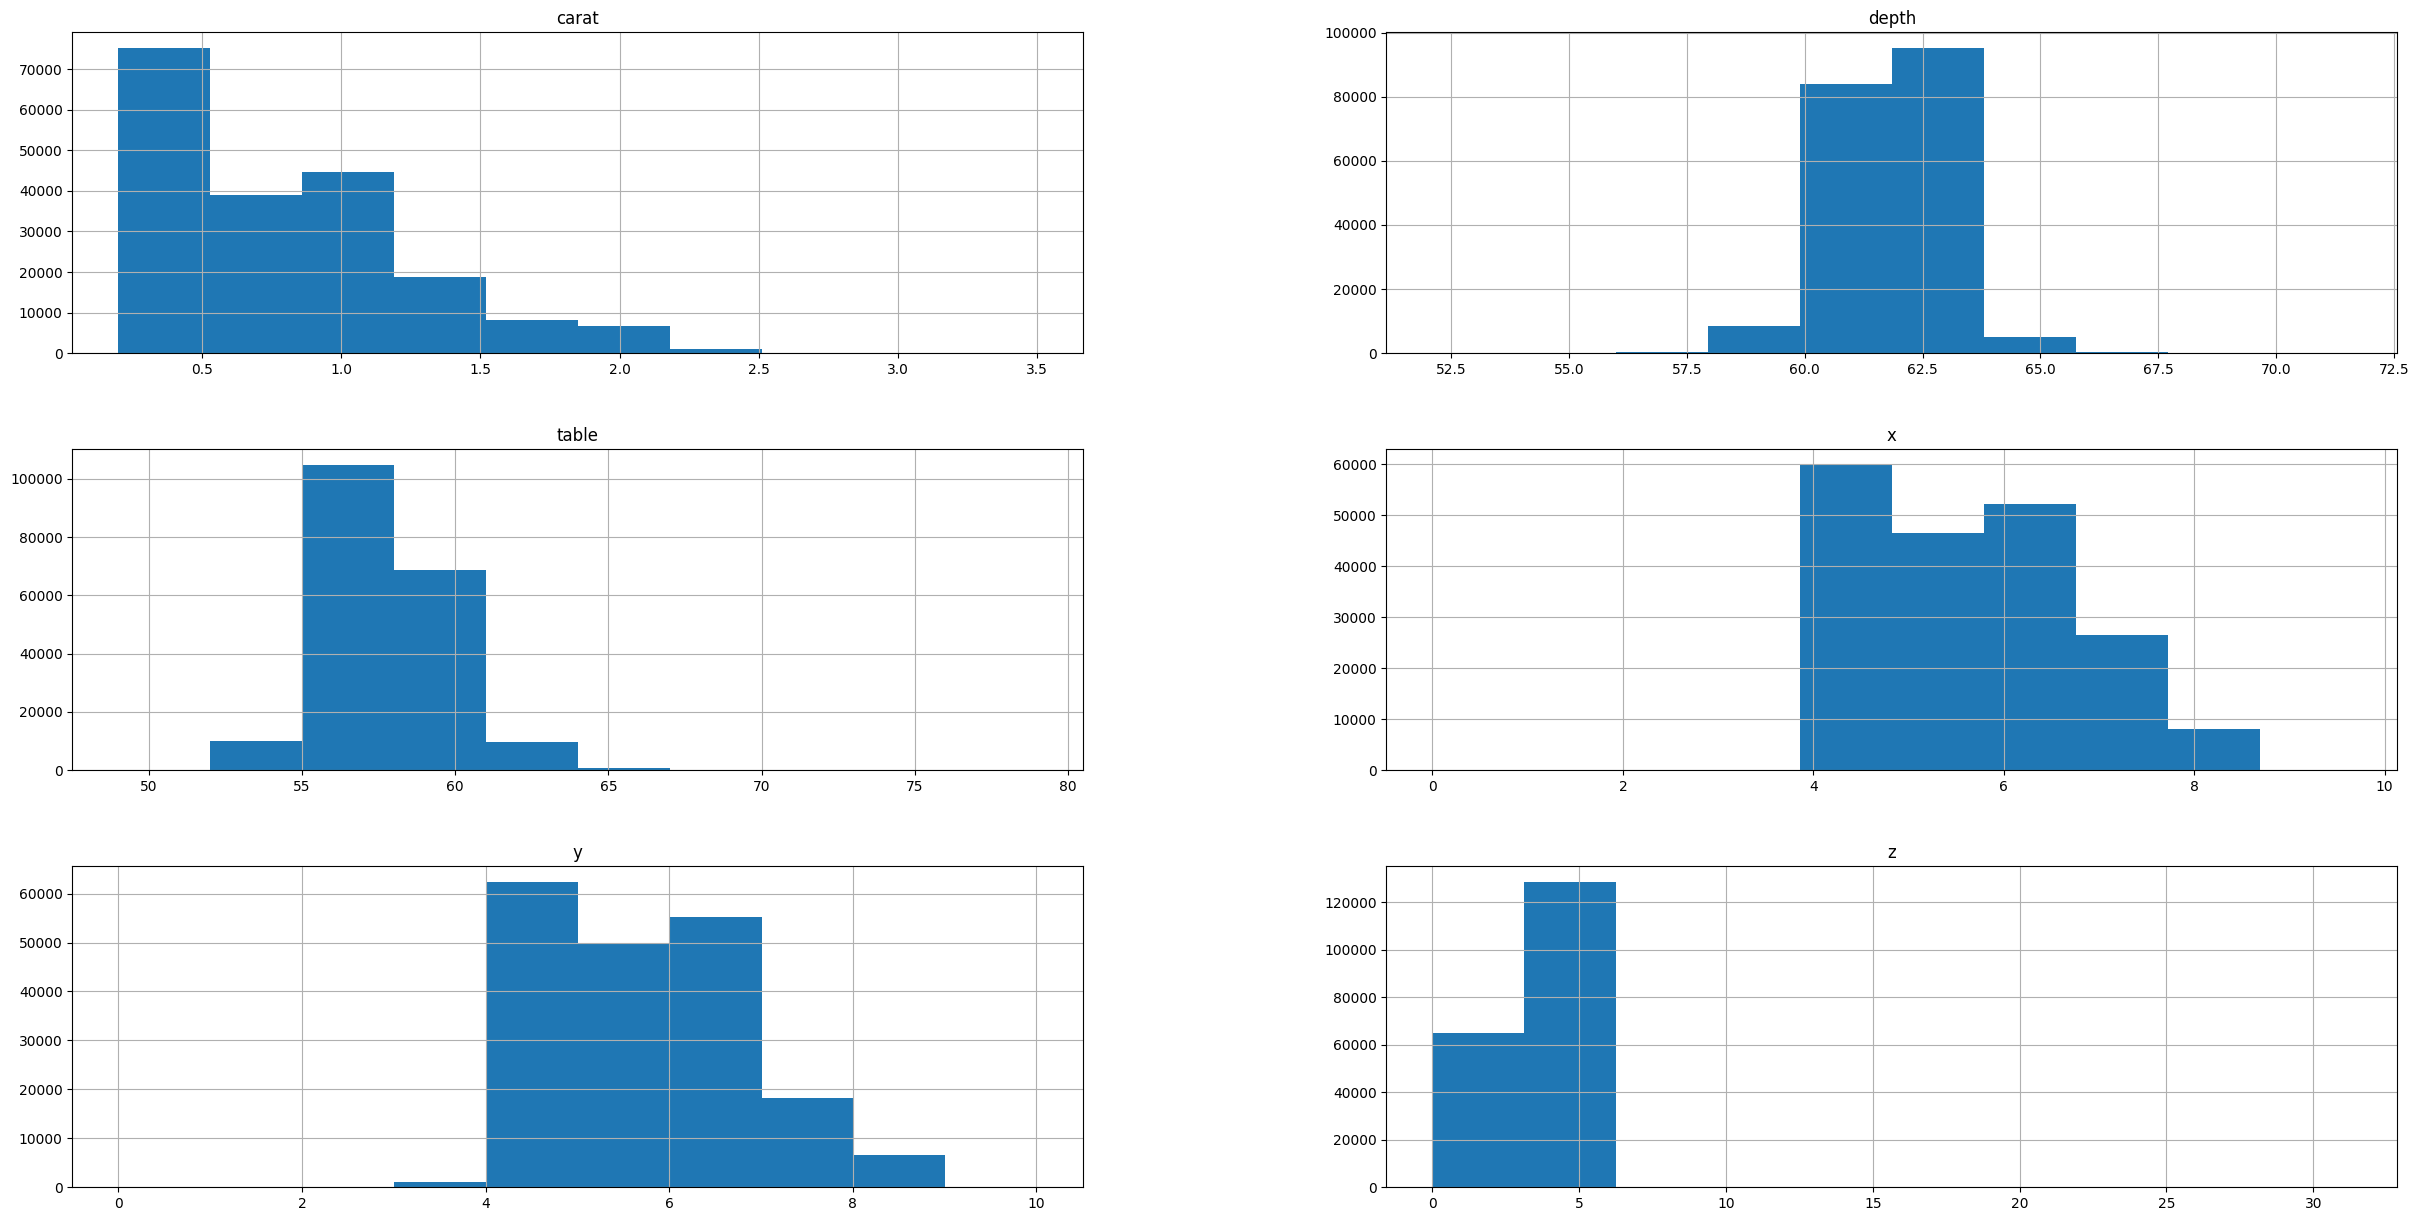

In [10]:
df1[numerical].hist(figsize=(30,15))

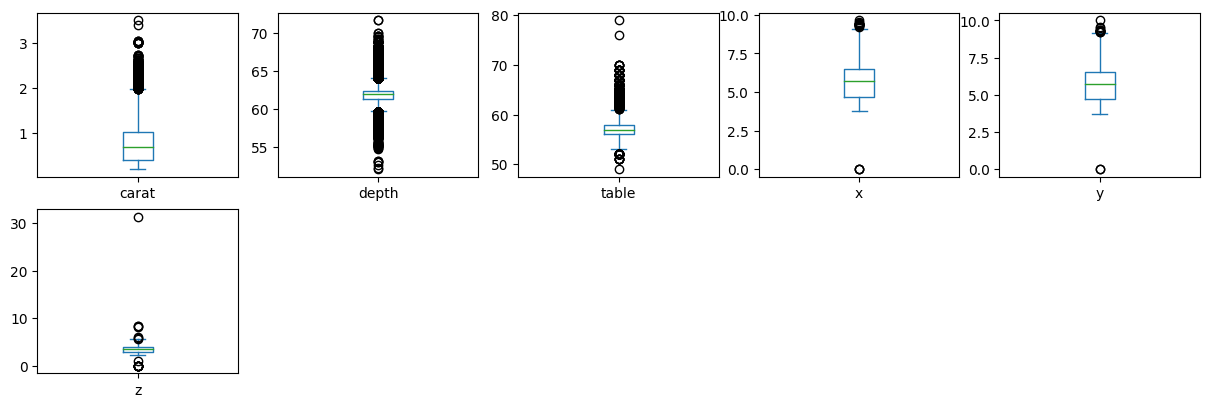

In [11]:
df1[numerical].plot(kind = "box",subplots = True,layout = (8,5),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

Categorical encoding

In [12]:
df2 = pd.get_dummies(data = df1, columns=categorical, drop_first=True)
df2.shape

(193573, 24)

In [13]:
24*24

576

Feature Engg

In [14]:
X = df2.drop(['price'],axis=1)
y= df2.price

X.shape, y.shape

((193573, 23), (193573,))

In [74]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((154858, 23), (38715, 23), (154858,), (38715,))

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(X_train, y_train)

LinearRegression()

In [77]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [78]:
y_pred_lin = reg.predict(X_test)

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_ln = mean_absolute_error(y_test,y_pred_lin)
rmse_ln = sqrt(mean_squared_error(y_test,y_pred_lin))
r_sq_ln = r2_score(y_test,y_pred_lin)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_ln,3),round(rmse_ln,3),round(r_sq_ln,3)))

Mean Absolute Error: 622.953
Root Mean Square Error: 944.662
R2 Score: 0.945


In [79]:
ridge = Ridge(alpha=.3) #coefficients are prevented to become too big by this alpha value
ridge.fit(X_train,y_train)

Ridge(alpha=0.3)

In [80]:
y_pred_ridge = ridge.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
rmse_ridge = sqrt(mean_squared_error(y_test,y_pred_ridge))
r_sq_ridge = r2_score(y_test,y_pred_ridge)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_ridge,3),round(rmse_ridge,3),round(r_sq_ridge,3)))

Mean Absolute Error: 622.952
Root Mean Square Error: 944.661
R2 Score: 0.945


Lasso - Feature sel

In [82]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

Lasso model coefficients for carat is 14297.477950486045:
Lasso model coefficients for depth is -128.94510752140334:
Lasso model coefficients for table is -38.36967872196805:
Lasso model coefficients for x is -1794.5880239042142:
Lasso model coefficients for y is -364.3752614213113:
Lasso model coefficients for z is -83.33450840779535:
Lasso model coefficients for cut_Good is 231.86348635278202:
Lasso model coefficients for cut_Ideal is 416.063937461247:
Lasso model coefficients for cut_Premium is 362.9193546715849:
Lasso model coefficients for cut_Very Good is 340.66362229571865:
Lasso model coefficients for color_E is -141.36499733598848:
Lasso model coefficients for color_F is -215.24274520423626:
Lasso model coefficients for color_G is -324.2296210301922:
Lasso model coefficients for color_H is -828.426866471354:
Lasso model coefficients for color_I is -1378.2339576911834:
Lasso model coefficients for color_J is -2265.4392088315863:
Lasso model coefficients for clarity_IF is 2523.4

In [83]:
y_pred_lasso = lasso.predict(X_test)

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_lasso = mean_absolute_error(y_test,y_pred_lasso)
rmse_lasso = sqrt(mean_squared_error(y_test,y_pred_lasso))
r_sq_lasso = r2_score(y_test,y_pred_lasso)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_lasso,3),round(rmse_lasso,3),round(r_sq_ridge,3)))

Mean Absolute Error: 622.366
Root Mean Square Error: 946.698
R2 Score: 0.945


Same results. using Poly reg

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

poly = PolynomialFeatures(degree = 2, interaction_only=True)


In [91]:
X_poly = poly.fit_transform(X)

In [92]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = model_selection.train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train_poly.shape

(135501, 277)

In [93]:
reg.fit(X_train_poly,y_train_poly)
ridge.fit(X_train_poly,y_train_poly)
lasso.fit(X_train_poly,y_train_poly)

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.450e+10, tolerance: 2.212e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

In [94]:
print("\n Regression Score: \n")
print(reg.score(X_train_poly, y_train_poly))
print(reg.score(X_test_poly, y_test_poly))

print("\n Ridge Score: \n")
print(ridge.score(X_train_poly, y_train_poly))
print(ridge.score(X_test_poly, y_test_poly))

print("\n Lasso Score: \n")
print(lasso.score(X_train_poly, y_train_poly))
print(lasso.score(X_test_poly, y_test_poly))


 Regression Score: 

0.9722055623946303
0.9688873852652395

 Ridge Score: 

0.9721620745675065
0.9689821102794055

 Lasso Score: 

0.970241340247486
0.9706255194497316


In [102]:
from sklearn.model_selection import GridSearchCV
lasso_alphas = np.linspace(0.01, 0.2, 21)
param_grid = {
              "alpha": lasso_alphas
             }



lasso = Lasso(random_state=11)

grid_search_lasso = GridSearchCV(lasso, param_grid=param_grid,verbose=10, cv=3,n_jobs=6)

grid_search_lasso.fit(X_train_poly,y_train_poly)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.249e+10, tolerance: 2.212e+08
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=3, estimator=Lasso(random_state=11), n_jobs=6,
             param_grid={'alpha': array([0.01  , 0.0195, 0.029 , 0.0385, 0.048 , 0.0575, 0.067 , 0.0765,
       0.086 , 0.0955, 0.105 , 0.1145, 0.124 , 0.1335, 0.143 , 0.1525,
       0.162 , 0.1715, 0.181 , 0.1905, 0.2   ])},
             verbose=10)

In [103]:
grid_search_lasso.best_estimator_.get_params()

{'alpha': 0.028999999999999998,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': 11,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [104]:
print("\n Lasso Score: \n")
print(grid_search_lasso.score(X_train_poly, y_train_poly))
print(grid_search_lasso.score(X_test_poly, y_test_poly))


 Lasso Score: 

0.9708429890221599
0.9712045226966528


In [108]:
y_pred_lasso = grid_search_lasso.predict(X_test_poly)
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_lasso = mean_absolute_error(y_test_poly,y_pred_lasso)
rmse_lasso = sqrt(mean_squared_error(y_test_poly,y_pred_lasso))
r_sq_lasso = r2_score(y_test_poly,y_pred_lasso)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_lasso,3),round(rmse_lasso,3),round(r_sq_ridge,3)))

Mean Absolute Error: 387.878
Root Mean Square Error: 682.227
R2 Score: 0.945


RF

In [15]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((154858, 23), (38715, 23), (154858,), (38715,))

In [16]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [17]:
X_train_RF.shape, X_test_RF.shape

((154858, 23), (38715, 23))

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None]
}
regr = RandomForestRegressor(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
Best params:  {'max_depth': 20, 'n_estimators': 1000}


In [19]:
y_pred_RF_cv = clf.predict(X_test_RF)
# print(y_pred_RF_100)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rfcv = mean_absolute_error(y_test,y_pred_RF_cv)
rmse_rfcv = sqrt(mean_squared_error(y_test,y_pred_RF_cv))
r_sq_rfcv = r2_score(y_test,y_pred_RF_cv)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rfcv,3),round(rmse_rfcv,3),round(r_sq_rfcv,3)))

Mean Absolute Error: 307.334
Root Mean Square Error: 619.903
R2 Score: 0.976


In [21]:
# save the model to disk
import pickle
filename = 'rf_model.pkl'
pickle.dump(clf.best_estimator_, open(filename, 'wb'))
# some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

Catboost

In [22]:
from catboost import CatBoostRegressor

cat_clf_5 = CatBoostRegressor(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


cat_clf_5.fit(X_train_RF, y_train,
        eval_set=(X_test_RF, y_test), 
        verbose=5
)

print('CatBoost model is fitted: ' + str(cat_clf_5.is_fitted()))
print('CatBoost model parameters:')
print(cat_clf_5.get_params())

0:	learn: 3674.2114995	test: 3659.3846260	best: 3659.3846260 (0)	total: 152ms	remaining: 606ms
4:	learn: 2567.4056980	test: 2561.0343864	best: 2561.0343864 (4)	total: 179ms	remaining: 0us

bestTest = 2561.034386
bestIteration = 4

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1, 'loss_function': 'RMSE'}


In [23]:
print('Training set score: {:.4f}'.format(cat_clf_5.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(cat_clf_5.score(X_test_RF, y_test)))

Training set score: 0.5957
Test set score: 0.5941


In [24]:
from catboost import CatBoostRegressor
cat_clf_10 = CatBoostRegressor(
    iterations=10,
     verbose=5,
)

cat_clf_10.fit(
    X_train_RF, y_train,
    
    eval_set=(X_test_RF, y_test),
)

Learning rate set to 0.5
0:	learn: 2286.8840234	test: 2284.6047593	best: 2284.6047593 (0)	total: 8.07ms	remaining: 72.7ms
5:	learn: 807.1665164	test: 809.3961882	best: 809.3961882 (5)	total: 41.3ms	remaining: 27.5ms
9:	learn: 728.8399194	test: 732.5035266	best: 732.5035266 (9)	total: 66.6ms	remaining: 0us

bestTest = 732.5035266
bestIteration = 9



In [25]:
print('Training set score: {:.4f}'.format(cat_clf_10.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(cat_clf_10.score(X_test_RF, y_test)))

Training set score: 0.9674
Test set score: 0.9668


In [43]:
from catboost import CatBoostRegressor
cat_clf_final = CatBoostRegressor(
    iterations=50000,
     verbose=5,
)

cat_clf_final.fit(
    X_train_RF, y_train,
    
    eval_set=(X_test_RF, y_test),
)

print('CatBoost model is fitted: ' + str(cat_clf_final.is_fitted()))
print('CatBoost model parameters:')
print(cat_clf_final.get_params())

Learning rate set to 0.010336
0:	learn: 4000.1927071	test: 3982.4812054	best: 3982.4812054 (0)	total: 8.07ms	remaining: 6m 43s
5:	learn: 3818.2262974	test: 3801.9289902	best: 3801.9289902 (5)	total: 42.6ms	remaining: 5m 55s
10:	learn: 3644.9958310	test: 3630.0193893	best: 3630.0193893 (10)	total: 75.7ms	remaining: 5m 43s
15:	learn: 3481.4276121	test: 3467.6503972	best: 3467.6503972 (15)	total: 108ms	remaining: 5m 37s
20:	learn: 3326.6566976	test: 3314.0719923	best: 3314.0719923 (20)	total: 141ms	remaining: 5m 36s
25:	learn: 3180.5839739	test: 3169.1332723	best: 3169.1332723 (25)	total: 173ms	remaining: 5m 33s
30:	learn: 3042.2951050	test: 3031.9409899	best: 3031.9409899 (30)	total: 233ms	remaining: 6m 15s
35:	learn: 2911.8773092	test: 2902.4817535	best: 2902.4817535 (35)	total: 270ms	remaining: 6m 15s
40:	learn: 2787.7423385	test: 2779.2864258	best: 2779.2864258 (40)	total: 306ms	remaining: 6m 13s
45:	learn: 2670.4600362	test: 2662.8918504	best: 2662.8918504 (45)	total: 338ms	remaining

In [48]:
print('Training set score: {:.4f}'.format(cat_clf_final.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(cat_clf_final.score(X_test_RF, y_test)))

Training set score: 0.9843
Test set score: 0.9787


In [49]:
y_pred_cat = cat_clf_final.predict(X_test_RF)

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_cat_clf = mean_absolute_error(y_test,y_pred_cat)
rmse_cat_clf = sqrt(mean_squared_error(y_test,y_pred_cat))
r_sq_cat_clf = r2_score(y_test,y_pred_cat)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_cat_clf,3),round(rmse_cat_clf,3),round(r_sq_cat_clf,3)))

Mean Absolute Error: 295.228
Root Mean Square Error: 587.136
R2 Score: 0.979


LGBM

In [51]:
# build the lightgbm model
import lightgbm as lgb
lgbm_clf = lgb.LGBMRegressor()
lgbm_clf.fit(X_train_RF, y_train)

LGBMRegressor()

In [52]:
print('Training set score: {:.4f}'.format(lgbm_clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(lgbm_clf.score(X_test_RF, y_test)))

Training set score: 0.9803
Test set score: 0.9787


In [53]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

param_grid = {
              "n_estimators": [1, 2,10,25,50,100,200,500,700,1000,1500,2000]
             }



LGB = lgb.LGBMRegressor(random_state=11)
#using decision tree as base

# run grid search
grid_search_ABC = GridSearchCV(LGB, param_grid=param_grid,verbose=10, cv=3,n_jobs=6)

grid_search_ABC.fit(X_train_RF,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=LGBMRegressor(random_state=11), n_jobs=6,
             param_grid={'n_estimators': [1, 2, 10, 25, 50, 100, 200, 500, 700,
                                          1000, 1500, 2000]},
             verbose=10)

In [54]:
print('Training set score: {:.4f}'.format(grid_search_ABC.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(grid_search_ABC.score(X_test_RF, y_test)))

Training set score: 0.9803
Test set score: 0.9787


In [55]:
y_pred_lgbm = grid_search_ABC.predict(X_test_RF)

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_lgbm = mean_absolute_error(y_test,y_pred_lgbm)
rmse_lgbm = sqrt(mean_squared_error(y_test,y_pred_lgbm))
r_sq_lgbm = r2_score(y_test,y_pred_lgbm)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_lgbm,3),round(rmse_lgbm,3),round(r_sq_lgbm,3)))

Mean Absolute Error: 302.769
Root Mean Square Error: 586.11
R2 Score: 0.979


XGBoost

In [61]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'booster':['gbtree'],
    'max_depth':[10,20,None],
}
xgb = xgb.XGBRegressor(random_state=10)
xgb_clf = GridSearchCV(xgb,param_grid=parameters,verbose=2,n_jobs=6,cv=3)
xgb_clf.fit(X_train_RF,y_train)
print("Best params: ", xgb_clf.best_params_)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
Best params:  {'booster': 'gbtree', 'max_depth': None, 'n_estimators': 150}


In [62]:
y_pred_xgb = xgb_clf.predict(X_test_RF)

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_xgb = mean_absolute_error(y_test,y_pred_xgb)
rmse_xgb = sqrt(mean_squared_error(y_test,y_pred_xgb))
r_sq_xgb = r2_score(y_test,y_pred_xgb)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_xgb,3),round(rmse_xgb,3),round(r_sq_xgb,3)))

Mean Absolute Error: 301.598
Root Mean Square Error: 600.173
R2 Score: 0.978


ANN

In [64]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [65]:
gem_model = Sequential()
gem_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
gem_model.add(Dense(512, activation = "relu"))
gem_model.add(Dense(1024, activation = "relu"))
gem_model.add(Dropout(0.2))
gem_model.add(Dense(1024, activation = "relu"))
gem_model.add(Dense(512, activation = "relu"))
gem_model.add(Dense(256, activation = "relu"))
gem_model.add(Flatten())
gem_model.add(Dense(512, activation = "relu"))
gem_model.add(Dropout(0.5))
gem_model.add(Dense(512, activation = "relu"))
gem_model.add(Dropout(0.5))
gem_model.add(Dense(1, activation = "linear",kernel_regularizer = tf.keras.regularizers.l1(l=0.001)))
gem_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               1

In [68]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the network :
gem_model.compile(optimizer=optimizer, loss=tf.keras.losses.MAE, metrics=[tf.keras.metrics.MAE])

In [69]:
m_loss = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [70]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='gem_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [71]:
history=gem_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=64, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1933/1936 [============================>.] - ETA: 0s - loss: 648.4930 - mean_absolute_error: 648.4749
Epoch 1: val_loss improved from inf to 375.33203, saving model to gem_model.h5
1936/1936 [==============================] - 9s 4ms/step - loss: 648.2615 - mean_absolute_error: 648.2435 - val_loss: 375.3320 - val_mean_absolute_error: 375.3166
Epoch 2/100
1925/1936 [============================>.] - ETA: 0s - loss: 521.5543 - mean_absolute_error: 521.5402
Epoch 2: val_loss improved from 375.33203 to 361.21005, saving model to gem_model.h5
1936/1936 [==============================] - 7s 3ms/step - loss: 521.4911 - mean_absolute_error: 521.4771 - val_loss: 361.2101 - val_mean_absolute_error: 361.1958
Epoch 3/100
1933/1936 [============================>.] - ETA: 0s - loss: 503.5897 - mean_absolute_error: 503.5760
Epoch 3: val_loss improved from 361.21005 to 356.86472, saving model to gem_model.h5
1936/1936 [==============================] - 8s 4ms/step - loss: 503.6395 - mean_absolute_error

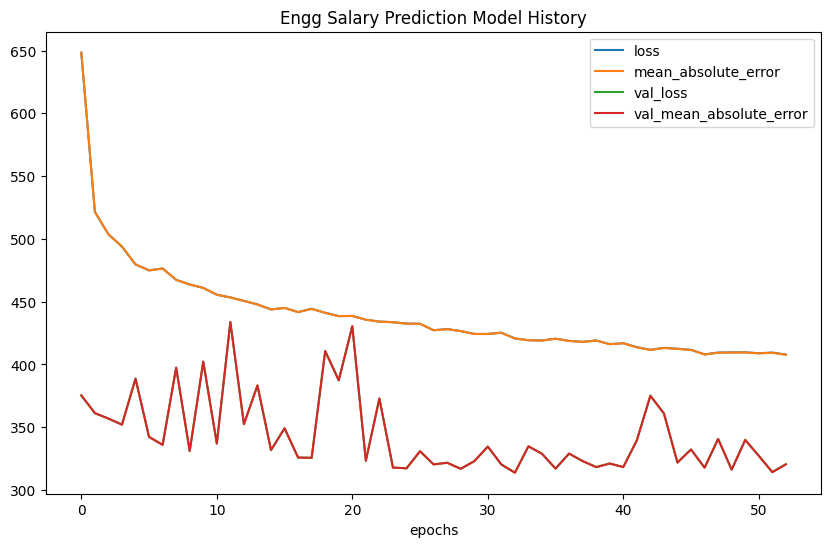

In [72]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Engg Salary Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [73]:
y_pred_cnn = gem_model.predict(X_test_RF)
# print(y_pred_cnn)

1210/1210 [==============================] - 2s 1ms/step


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_cnn = mean_absolute_error(y_test,y_pred_cnn)
rmse_cnn = sqrt(mean_squared_error(y_test,y_pred_cnn))
r_sq_cnn = r2_score(y_test,y_pred_cnn)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_cnn,3),round(rmse_cnn,3),round(r_sq_cnn,3)))

Mean Absolute Error: 307.465
Root Mean Square Error: 595.789
R2 Score: 0.978


In [80]:
linear_reg_results =  pd.Series({ "MAE": mae_ln, "RMSE": rmse_ln, "R-Square": r_sq_ln }, name="Linear Regression")
rf_cv_results =  pd.Series({ "MAE": mae_rfcv, "RMSE": rmse_rfcv, "R-Square": r_sq_rfcv }, name="Random Forest-CV")
cat_results =  pd.Series({ "MAE": mae_cat_clf, "RMSE": rmse_cat_clf, "R-Square": r_sq_cat_clf }, name="Catboost")
lgbm_results =  pd.Series({ "MAE": mae_lgbm, "RMSE": rmse_lgbm, "R-Square": r_sq_lgbm }, name="LGBM")
xgb_results =  pd.Series({ "MAE": mae_xgb, "RMSE": rmse_xgb, "R-Square": r_sq_xgb }, name="XGB")
cnn_results = pd.Series({ "MAE": mae_cnn, "RMSE": rmse_cnn, "R-Square": r_sq_cnn }, name="CNN")


results = pd.DataFrame([linear_reg_results, rf_cv_results, cat_results, lgbm_results ,xgb_results, cnn_results])
results.round(3)

,MAE,RMSE,R-Square
Linear Regression,622.953,944.662,0.945
Random Forest-CV,307.334,619.903,0.976
Catboost,295.228,587.136,0.979
LGBM,302.769,586.110,0.979
XGB,301.598,600.173,0.978
CNN,307.465,595.789,0.978


Test data

In [100]:
test_df = pd.read_csv('test.csv')
test_df_1 = test_df.drop(['id'],axis=1)
test_df_1.shape

(129050, 9)

In [101]:
categorical = [var for var in test_df_1.columns if test_df_1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 3 categorical variables

The categorical variables : ['cut', 'color', 'clarity']


In [102]:
numerical = [var for var in test_df_1.columns if test_df_1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 6 numerical variables

The numerical variables : ['carat', 'depth', 'table', 'x', 'y', 'z']


In [103]:
test_df_2 = pd.get_dummies(data = test_df_1, columns=categorical, drop_first=True)
test_df_2.shape

(129050, 23)

In [104]:
test_df_2_RF = scaler.fit_transform(test_df_2)
test_df_2_RF = pd.DataFrame(test_df_2_RF,columns=cols)

Preparing sample df

In [105]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,id,price
0,193573,3969.155
1,193574,3969.155
2,193575,3969.155
3,193576,3969.155
4,193577,3969.155


choosing best model. LGBM

In [153]:
y_pred_test_lgbm = grid_search_ABC.predict(test_df_2_RF)

In [154]:
submission = pd.DataFrame(data={'id': sample.id, 'price': y_pred_test_lgbm})
submission.head()

,id,price
0,193573,712.112752
1,193574,2048.328231
2,193575,1927.364322
3,193576,684.156065
4,193577,4733.962661


In [94]:
submission.to_csv('lgbm_solo_sub.csv',index=False)

cat solo

In [155]:
y_pred_test_cat = cat_clf_final.predict(test_df_2_RF)

In [156]:
submission = pd.DataFrame(data={'id': sample.id, 'price': y_pred_test_cat})
submission.head()

,id,price
0,193573,781.362262
1,193574,1929.595388
2,193575,1840.304132
3,193576,642.830331
4,193577,4568.465165


In [113]:
submission.to_csv('cat_solo_sub.csv',index=False)

RF solo

In [108]:
y_pred_test_rf = clf.predict(test_df_2_RF)

In [109]:
submission = pd.DataFrame(data={'id': sample.id, 'price': y_pred_test_rf})
submission.head()

,id,price
0,193573,728.563662
1,193574,1848.053025
2,193575,1565.717445
3,193576,699.842790
4,193577,3753.523000


In [110]:
submission.to_csv('rf_solo_sub.csv',index=False)

ann solo

In [115]:
y_pred_test_ann = gem_model.predict(test_df_2_RF)

4033/4033 [==============================] - 5s 1ms/step


In [135]:
y_test_ann = y_pred_test_ann.tolist()

In [149]:
y_test_ann = y_pred_test_ann.flatten()

In [150]:
y_test_ann

array([ 848.31085, 1917.6147 , 1438.0349 , ..., 4590.8535 , 4415.6973 ,
       3182.3416 ], dtype=float32)

In [151]:
submission = pd.DataFrame(data={'id': sample.id, 'price': y_test_ann})
submission.head()

,id,price
0,193573,848.310852
1,193574,1917.614746
2,193575,1438.034912
3,193576,759.626282
4,193577,4333.174805


In [152]:
submission.to_csv('ann_solo_sub.csv',index=False)

xgb

In [157]:
y_pred_test_xgb = xgb_clf.predict(test_df_2_RF)

In [158]:
submission = pd.DataFrame(data={'id': sample.id, 'price': y_pred_test_xgb})
submission.head()

,id,price
0,193573,757.317932
1,193574,1986.497681
2,193575,1784.647461
3,193576,615.049744
4,193577,4567.886719


In [159]:
submission.to_csv('xgb_solo_sub.csv',index=False)

ensemble of xgb, lgbm, catboost

In [160]:
y_pred_final = (y_pred_test_xgb+y_pred_test_lgbm+y_pred_test_cat)/3

In [161]:
y_pred_final

array([ 750.26431516, 1988.14043322, 1850.77197166, ..., 4940.38796283,
       7056.80128713, 3422.91890265])

In [162]:
submission = pd.DataFrame(data={'id': sample.id, 'price': y_pred_final})
submission.head()

,id,price
0,193573,750.264315
1,193574,1988.140433
2,193575,1850.771972
3,193576,647.345380
4,193577,4623.438182


In [163]:
submission.to_csv('final_ensemble.csv',index=False)